<a href="https://colab.research.google.com/github/fourfeatherz/DS2002S25/blob/main/python/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [1]:
import sqlite3

conn = sqlite3.connect('superhero_db.sqlite')

cursor = conn.cursor()

In [2]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT NOT NULL
);
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER NOT NULL,
    villain_id INTEGER NOT NULL,
    outcome TEXT NOT NULL,
    FOREIGN KEY (hero_id) REFERENCES heroes(id),
    FOREIGN KEY (villain_id) REFERENCES villains(id)
);
""")


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [3]:
heroes_data = [
    (1, 'Spider-Man', 'Web-slinging', 'Avengers'),
    (2, 'Iron Man', 'Powered Armor', 'Avengers'),
    (3, 'Batman', 'Genius Detective', 'Justice League'),
    (4, 'Superman', 'Super Strength', 'Justice League'),
    (5, 'Thor', 'God of Thunder', 'Avengers'),
    (6, 'Wonder Woman', 'Amazonian Strength', 'Justice League'),
    (7, 'Black Panther', 'Enhanced Agility', 'Avengers'),
    (8, 'The Flash', 'Super Speed', 'Justice League'),
    (9, 'Hulk', 'Super Strength', 'Avengers'),
    (10, 'Doctor Strange', 'Mystic Arts', 'Avengers')
]
cursor.executemany('''
INSERT INTO heroes (id, name, power, team) VALUES (?, ?, ?, ?)
''', heroes_data)

cursor.execute("SELECT * FROM heroes")
print(cursor.fetchall())



IntegrityError: UNIQUE constraint failed: heroes.id

In [ ]:
villains_data = [
    (1, 'Green Goblin', 'Terrorize New York'),
    (2, 'Thanos', 'Collect all Infinity Stones'),
    (3, 'Joker', 'Spread chaos in Gotham'),
    (4, 'Lex Luthor', 'Defeat Superman'),
    (5, 'Loki', 'Trick humanity into worshiping him'),
    (6, 'Ultron', 'AI world domination'),
    (7, 'Darkseid', 'Control the universe'),
    (8, 'Venom', 'Consume Spider-Man'),
    (9, 'Magneto', 'Mutant supremacy'),
    (10, 'Red Skull', 'Revive Hydra')
]

cursor.executemany('''
INSERT INTO villains (id, name, evil_plan) VALUES (?, ?, ?)
''', villains_data)

cursor.execute("SELECT * FROM villains")
print(cursor.fetchall())

In [ ]:
battles_data = [
    (1, 1, 2, 'Hero Wins'),
    (2, 3, 4, 'Villain Wins'),
    (3, 5, 6, 'Hero Wins'),
    (4, 7, 8, 'Hero Wins'),
    (5, 9, 10, 'Hero Wins'),
    (6, 2, 3, 'Draw'),
    (7, 4, 5, 'Villain Wins'),
    (8, 6, 7, 'Hero Wins'),
    (9, 8, 9, 'Hero Wins'),
    (10, 10, 1, 'Villain Wins')
]

cursor.executemany('''
INSERT INTO battles (id, hero_id, villain_id, outcome) VALUES (?, ?, ?, ?)
''', battles_data)

cursor.execute("SELECT * FROM battles")
print(cursor.fetchall())



In [ ]:
cursor.execute("SELECT * FROM heroes LIMIT 5")
print(cursor.fetchall())

cursor.execute("SELECT * FROM villains LIMIT 5")
print(cursor.fetchall())

cursor.execute("SELECT * FROM battles LIMIT 5")
print(cursor.fetchall())



## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

1. Retrieve all superheroes and their powers.

In [4]:
cursor.execute("""
SELECT name, power
FROM heroes;
""")

print(cursor.fetchall())


[('Spider-Man', 'Web-slinging'), ('Iron Man', 'Powered Armor'), ('Batman', 'Genius Detective'), ('Superman', 'Super Strength'), ('Thor', 'God of Thunder'), ('Wonder Woman', 'Amazonian Strength'), ('Black Panther', 'Enhanced Agility'), ('The Flash', 'Super Speed'), ('Hulk', 'Super Strength'), ('Doctor Strange', 'Mystic Arts')]


2. Find all battles where the hero won.

In [5]:
cursor.execute("""
SELECT *
FROM battles
WHERE outcome = 'Hero Wins';
""")

print(cursor.fetchall())

[(1, 1, 2, 'Hero Wins'), (3, 5, 6, 'Hero Wins'), (4, 7, 8, 'Hero Wins'), (5, 9, 10, 'Hero Wins'), (8, 6, 7, 'Hero Wins'), (9, 8, 9, 'Hero Wins')]


3. List all villains and their evil plans

In [6]:
cursor.execute("""
SELECT name, evil_plan
FROM villains;
""")

print(cursor.fetchall())

[('Green Goblin', 'Terrorize New York'), ('Thanos', 'Collect all Infinity Stones'), ('Joker', 'Spread chaos in Gotham'), ('Lex Luthor', 'Defeat Superman'), ('Loki', 'Trick humanity into worshiping him'), ('Ultron', 'AI world domination'), ('Darkseid', 'Control the universe'), ('Venom', 'Consume Spider-Man'), ('Magneto', 'Mutant supremacy'), ('Red Skull', 'Revive Hydra')]


4. Determine which superhero has fought the most battles.

In [7]:
cursor.execute("""
SELECT heroes.name, COUNT(battles.id) AS battle_count
FROM battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY heroes.name
ORDER BY battle_count DESC
LIMIT 1;
""")

print(cursor.fetchall())


[('Wonder Woman', 1)]


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [ ]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS battle_locations (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    battle_id INTEGER NOT NULL,
    location TEXT NOT NULL,
    FOREIGN KEY (battle_id) REFERENCES battles(id)
);
""")
conn.commit()


In [ ]:
battle_locations_data = [
    (1, 'New York City'),
    (2, 'Gotham City'),
    (3, 'Asgard'),
    (4, 'Wakanda'),
    (5, 'S.H.I.E.L.D. Helicarrier'),
    (6, 'Metropolis'),
    (7, 'Titan'),
    (8, 'Central City'),
    (9, 'Genosha'),
    (10, 'Latveria')
]

cursor.executemany("""
INSERT INTO battle_locations (battle_id, location) VALUES (?, ?)
""", battle_locations_data)

conn.commit()


Retrieve all of the battles, the locations, and the participants:

In [ ]:
cursor.execute("""
SELECT battles.id, heroes.name AS hero, villains.name AS villain, battle_locations.location, battles.outcome
FROM battles
JOIN heroes ON battles.hero_id = heroes.id
JOIN villains ON battles.villain_id = villains.id
JOIN battle_locations ON battles.id = battle_locations.battle_id;
""")

for row in cursor.fetchall():
    print(row)


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

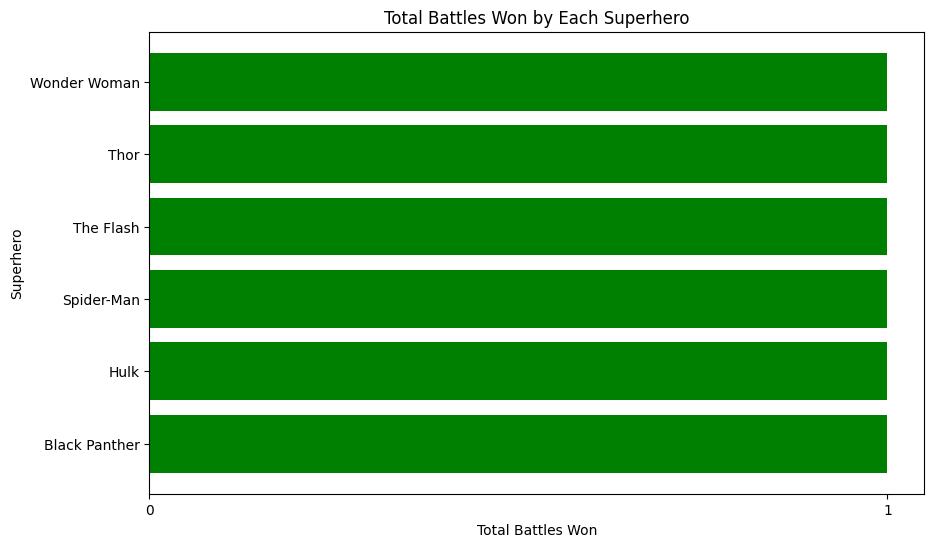

In [8]:
import matplotlib.pyplot as plt

# Query to count battles won per superhero
cursor.execute("""
SELECT heroes.name, COUNT(battles.id) AS wins
FROM battles
JOIN heroes ON battles.hero_id = heroes.id
WHERE battles.outcome = 'Hero Wins'
GROUP BY heroes.name
ORDER BY wins DESC;
""")

# Fetch data
results = cursor.fetchall()

# Extract superhero names and win counts
heroes = [row[0] for row in results]
wins = [int(row[1]) for row in results]  # Ensuring integer values

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(heroes, wins, color='green')  # Using green to represent wins
plt.xlabel("Total Battles Won")
plt.ylabel("Superhero")
plt.title("Total Battles Won by Each Superhero")
plt.xticks(range(0, max(wins) + 1))  # Ensure whole numbers on x-axis
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!